### March madness expected payout

First importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data from sbsb_ file
probabilities_df = pd.read_excel('odds.xlsx')

# Display the first few rows of the dataframe
display(probabilities_df)


,team_name,team_seed,team_region,playin_flag,team_alive,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,win_odds,timestamp
0,Auburn,1,South,0,1,1,1,1.000000,0.760018,0.531163,0.303295,0.152806,5.544263,2025-03-23 06:14:53.620
1,Alabama St.,16a,South,1,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
2,Saint Francis (PA),16b,South,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
3,Louisville,8,South,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
4,Creighton,9,South,0,0,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Montana,14,East,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
64,Saint Mary's (CA),7,East,0,1,1,1,0.280058,0.143664,0.039843,0.013612,0.005066,196.397759,2025-03-23 06:14:53.620
65,Vanderbilt,10,East,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
66,Alabama,2,East,0,1,1,1,0.719942,0.503868,0.216224,0.103514,0.052500,18.04756,2025-03-23 06:14:53.620


In [3]:

# Read the data from the expected payouts file
payouts_df = pd.read_excel('teams_and_payouts.xlsx')

# Display the first few rows of the payouts dataframe 
display(payouts_df)


,Region Seed,Team,Price,Buyer,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1.0,Florida,142,Abe,NaN,NaN,NaN,NaN,NaN,West,NaN,NaN,NaN,NaN,Midwest,NaN,NaN
1,2.0,St. John's,55,Decker/Cooper,NaN,NaN,NaN,NaN,Seed,Team,Price,Buyer,NaN,Seed,Team,Price,Buyer
2,3.0,Texas Tech,42,Phil/Noah/Hails,NaN,NaN,NaN,NaN,1,Florida,142,Abe,NaN,1,Houston,105,Joe/Owen/Axel
3,4.0,Maryland,40,Jeff/Dre,NaN,NaN,NaN,NaN,2,St. John's,55,Decker/Cooper,NaN,2,Tennessee,71,Jeff/Dre
4,5.0,Memphis,33,Talon/Talan,NaN,NaN,NaN,NaN,3,Texas Tech,42,Phil/Noah/Hails,NaN,3,Kentucky,42,Joe/Owen/Axel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,13.0,Akron,12,Davies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,14.0,Montana,8,Sprung/Jack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,15.0,Robert Morris,12,Jeff/Dre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,16.0,Mount St. Mary's (MD),10,Sprung/Jack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Select only the specified columns and remove the last row
payouts_df = payouts_df[['Region Seed', 'Team', 'Price', 'Buyer']].iloc[:-1]

# Display the cleaned dataframe
display(payouts_df)


,Region Seed,Team,Price,Buyer
0,1.0,Florida,142,Abe
1,2.0,St. John's,55,Decker/Cooper
2,3.0,Texas Tech,42,Phil/Noah/Hails
3,4.0,Maryland,40,Jeff/Dre
4,5.0,Memphis,33,Talon/Talan
...,...,...,...,...
59,12.0,Liberty,15,Jeff/Dre
60,13.0,Akron,12,Davies
61,14.0,Montana,8,Sprung/Jack
62,15.0,Robert Morris,12,Jeff/Dre


In [5]:
first_round_payouts = 19.35
third_round_payouts = 58.05
final_four_payouts = 77.40
champion_payouts = 96.75

In [6]:
# Create a dictionary to store buyer-team mappings
buyer_teams = {}

# Iterate through the payouts dataframe to populate the dictionary
for _, row in payouts_df.iterrows():
    buyer = row['Buyer']
    team = row['Team']
    
    # Add team to buyer's list, creating new list if buyer not in dict
    if buyer in buyer_teams:
        buyer_teams[buyer].append(team)
    else:
        buyer_teams[buyer] = [team]

# Display the buyer-teams dictionary
display(buyer_teams)



{'Abe': ['Florida', 'Auburn', 'Michigan St.', "Saint Mary's (CA)", 'VCU'],
 'Decker/Cooper': ["St. John's", 'Oklahoma', 'North Carolina', 'Clemson'],
 'Phil/Noah/Hails': ['Texas Tech',
  'Grand Canyon',
  'Texas A&M',
  'Utah St.',
  'Troy',
  'Vanderbilt'],
 'Jeff/Dre': ['Maryland',
  'Tennessee',
  'SIU Edwardsville',
  'Duke',
  'Arizona',
  'Mississippi St.',
  'Liberty',
  'Robert Morris'],
 'Talon/Talan': ['Memphis', 'Bryant', 'Alabama St.', 'Purdue'],
 'Taylor/Knepper': ['Missouri', 'Omaha', 'Michigan', 'Yale'],
 'Yurman': ['Kansas', 'UConn', 'Lipscomb', 'Wofford'],
 'Davies': ['Arkansas',
  'Colorado St.',
  'UNC Wilmington',
  'Norfolk St.',
  'Louisville',
  'Creighton',
  'New Mexico',
  'McNeese',
  'High Point',
  'Alabama',
  'BYU',
  'Baylor',
  'Akron'],
 'Grayson': ['Drake', 'Georgia', 'Wisconsin'],
 'Sprung/Jack': ['Iowa St.',
  'Gonzaga',
  'Xavier',
  'Montana',
  "Mount St. Mary's (MD)"],
 'Joe/Owen/Axel': ['Ole Miss', 'Houston', 'Kentucky', 'UCLA', 'Oregon'],
 'Ke

In [7]:
# loop through the team names in the buyer_teams dictionary and only print the teams that dont have a matching string in    the probabilities dataframe
for buyer, teams in buyer_teams.items():
    for team in teams:
        if team not in probabilities_df['team_name'].values:
            print(team)



In [8]:
display(probabilities_df.head())

,team_name,team_seed,team_region,playin_flag,team_alive,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,win_odds,timestamp
0,Auburn,1,South,0,1,1,1,1.0,0.760018,0.531163,0.303295,0.152806,5.544263,2025-03-23 06:14:53.620
1,Alabama St.,16a,South,1,0,1,0,0.0,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
2,Saint Francis (PA),16b,South,1,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
3,Louisville,8,South,0,0,1,0,0.0,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620
4,Creighton,9,South,0,0,1,1,0.0,0.000000,0.000000,0.000000,0.000000,--,2025-03-23 06:14:53.620


In [9]:
# Initialize a dictionary to store buyer payouts
buyer_payouts = {buyer: 0 for buyer in buyer_teams.keys()}
buyer_costs = {buyer: 0 for buyer in buyer_teams.keys()}

# Calculate expected payouts for each buyer
for buyer, teams in buyer_teams.items():
    for team in teams:
        # Get team's win probabilities from probabilities dataframe
        team_probs = probabilities_df[probabilities_df['team_name'] == team].iloc[0]
        
        # Calculate expected payout from each round
        rd2_payout = team_probs['rd2_win'] * first_round_payouts
        rd3_payout = team_probs['rd3_win'] * first_round_payouts
        rd4_payout = team_probs['rd4_win'] * third_round_payouts
        rd5_payout = team_probs['rd5_win'] * third_round_payouts
        ff_payout = team_probs['rd6_win'] * final_four_payouts
        champ_payout = team_probs['rd7_win'] * champion_payouts
        
        # Sum up total expected payout for this team
        total_team_payout = rd2_payout + rd3_payout + rd4_payout + rd5_payout + ff_payout + champ_payout
        
        # Add to buyer's running total
        buyer_payouts[buyer] += total_team_payout
        
        # Add team cost to buyer's total spent
        team_cost = payouts_df[payouts_df['Team'] == team]['Price'].iloc[0]
        buyer_costs[buyer] += team_cost

# Create dataframe with results
results_df = pd.DataFrame({
    'Buyer': list(buyer_payouts.keys()),
    'Expected Payout': list(buyer_payouts.values()),
    'Total Spent': list(buyer_costs.values())
})

# Add third_round_payout to Sprung/Jack's expected payout
# Add third_round_payout to Sprung/Jack's expected payout
results_df.loc[results_df['Buyer'] == 'Sprung/Jack', 'Expected Payout'] += third_round_payouts

# Calculate net expected value
results_df['Expected Net'] = results_df['Expected Payout'] - results_df['Total Spent']

# Sort by expected payout
results_df = results_df.sort_values('Expected Payout', ascending=False)

# Round numeric columns to 2 decimal places
results_df = results_df.round(2)

# Display results
display(results_df)


,Buyer,Expected Payout,Total Spent,Expected Net
0,Abe,390.57,334,56.57
3,Jeff/Dre,364.27,335,29.27
7,Davies,356.56,273,83.56
10,Joe/Owen/Axel,292.94,208,84.94
9,Sprung/Jack,135.74,112,23.74
2,Phil/Noah/Hails,126.47,130,-3.53
5,Taylor/Knepper,63.82,96,-32.18
4,Talon/Talan,62.46,91,-28.54
12,Paley,49.51,25,24.51
8,Grayson,38.70,85,-46.30


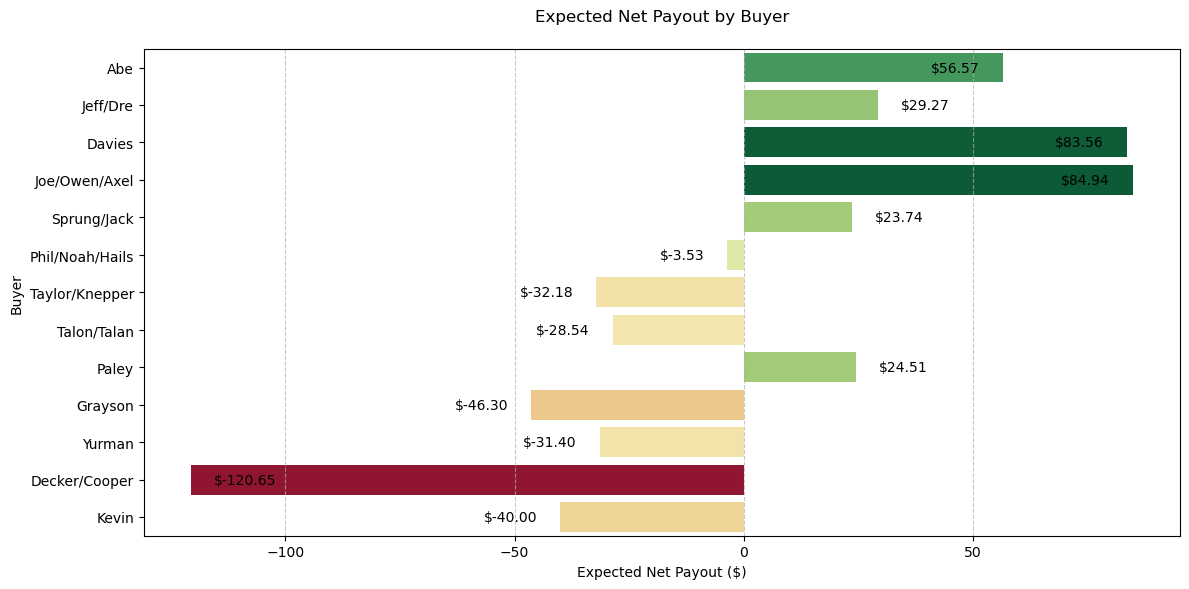

In [17]:
# Create figure and axis
plt.figure(figsize=(12, 6))

# Normalize Expected Net for colormap scaling
norm = plt.Normalize(results_df['Expected Net'].min(), results_df['Expected Net'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
colors = [sm.to_rgba(v) for v in results_df['Expected Net']]

# Create horizontal bar plot with manually set colors
ax = sns.barplot(data=results_df,
                 y='Buyer',
                 x='Expected Net',
                 palette=colors)

# Remove legend if added
if ax.get_legend():
    ax.get_legend().remove()

# Add value labels with conditional flipping based on size
for i, v in enumerate(results_df['Expected Net']):
    if abs(v) > 50:
        # Flip to inside of the bar (opposite side)
        offset = -5 if v >= 0 else 5
        ha = 'right' if v >= 0 else 'left'
    else:
        # Keep outside the bar
        offset = 5 if v >= 0 else -5
        ha = 'left' if v >= 0 else 'right'
    
    ax.text(v + offset, i, f'${v:,.2f}', 
            va='center',
            ha=ha)

# Customize plot
plt.title('Expected Net Payout by Buyer', pad=20)
plt.xlabel('Expected Net Payout ($)')
plt.ylabel('Buyer')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
# Calculate expected payouts for each team
team_payouts = []

# Iterate through each team in the probabilities dataframe
for _, team_row in probabilities_df.iterrows():
    team_name = team_row['team_name']
    
    # Calculate expected payout from each round
    rd2_payout = team_row['rd2_win'] * first_round_payouts
    rd3_payout = team_row['rd3_win'] * first_round_payouts
    rd4_payout = team_row['rd4_win'] * third_round_payouts
    rd5_payout = team_row['rd5_win'] * third_round_payouts
    ff_payout = team_row['rd6_win'] * final_four_payouts
    champ_payout = team_row['rd7_win'] * champion_payouts
    
    # Sum up total expected payout for this team
    total_team_payout = rd2_payout + rd3_payout + rd4_payout + rd5_payout + ff_payout + champ_payout
    
    # Get team's cost from payouts dataframe
    team_cost = payouts_df[payouts_df['Team'] == team_name]['Price'].iloc[0] if team_name in payouts_df['Team'].values else 0
    
    team_payouts.append({
        'Team': team_name,
        'Region': team_row['team_region'],
        'Seed': team_row['team_seed'],
        'Expected Payout': total_team_payout,
        'Cost': team_cost,
        'Expected Net': total_team_payout - team_cost
    })

# Create dataframe with results
team_results_df = pd.DataFrame(team_payouts)

# Sort by expected payout
team_results_df = team_results_df.sort_values('Expected Payout', ascending=False)

# Round numeric columns to 2 decimal places
team_results_df = team_results_df.round(2)

# Display results
display(team_results_df)

,Team,Region,Seed,Expected Payout,Cost,Expected Net
34,Houston,Midwest,1,152.27,105,47.27
0,Auburn,South,1,151.91,100,51.91
51,Duke,East,1,147.62,131,16.62
18,Florida,West,1,121.07,142,-20.93
28,Texas Tech,West,3,107.12,42,65.12
...,...,...,...,...,...,...
3,Louisville,South,8,0.00,19,-19.00
37,Georgia,Midwest,9,0.00,22,-22.00
38,Clemson,Midwest,5,0.00,45,-45.00
41,High Point,Midwest,13,0.00,12,-12.00


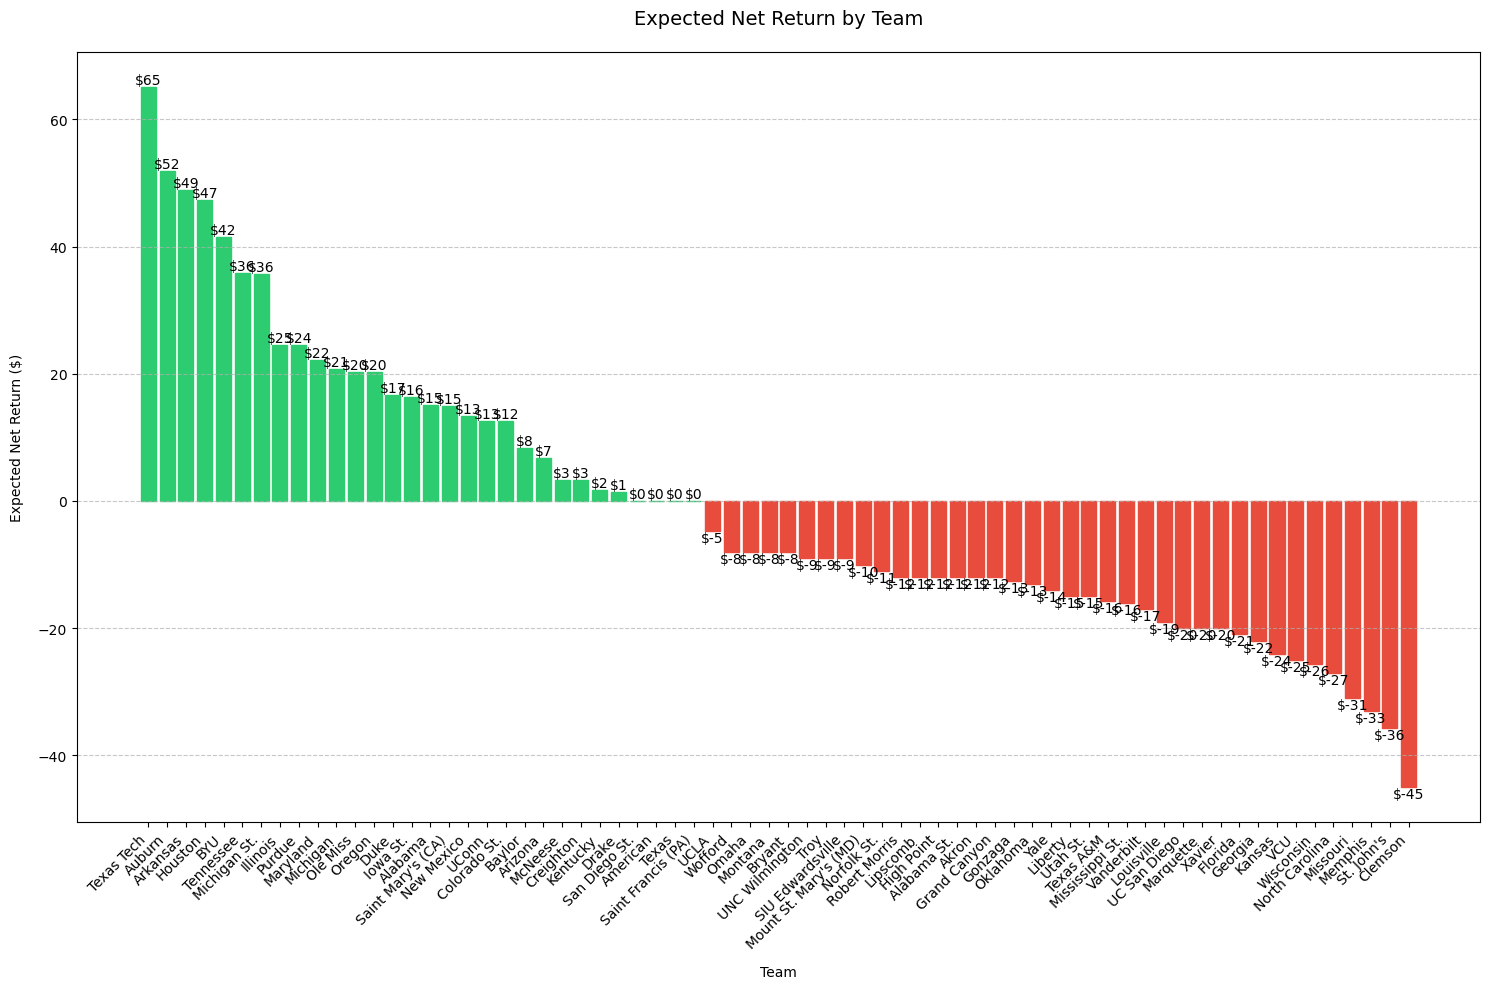

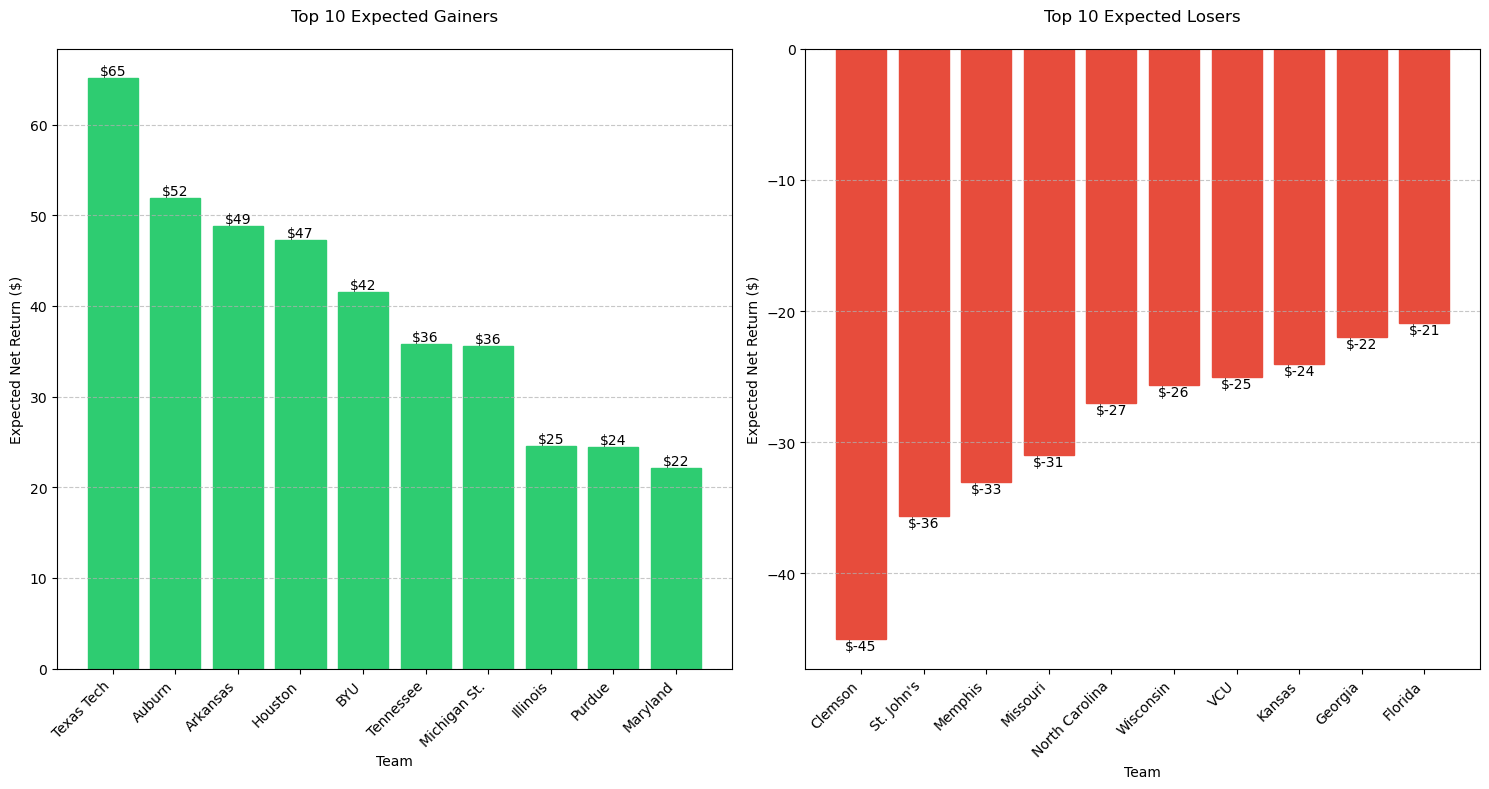

In [12]:
# Create bar plot of expected net by team
plt.figure(figsize=(15, 10))

# Sort teams by expected net return
sorted_teams = team_results_df.sort_values('Expected Net', ascending=False)

# Create bar plot
bars = plt.bar(sorted_teams['Team'], sorted_teams['Expected Net'])

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Expected Net Return by Team', pad=20, fontsize=14)
plt.xlabel('Team', labelpad=10)
plt.ylabel('Expected Net Return ($)', labelpad=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Color bars based on positive/negative values
for bar in bars:
    if bar.get_height() >= 0:
        bar.set_color('#2ecc71')  # Green for positive
    else:
        bar.set_color('#e74c3c')  # Red for negative

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}',
             ha='center', va='bottom' if height >= 0 else 'top')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Create a more focused view of top/bottom performers
top_n = 10
top_gainers = team_results_df.nlargest(top_n, 'Expected Net')
top_losers = team_results_df.nsmallest(top_n, 'Expected Net')

plt.figure(figsize=(15, 8))

# Plot top gainers
plt.subplot(1, 2, 1)
bars1 = plt.bar(top_gainers['Team'], top_gainers['Expected Net'])
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Expected Gainers', pad=20)
plt.xlabel('Team')
plt.ylabel('Expected Net Return ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Color and label the bars
for bar in bars1:
    bar.set_color('#2ecc71')
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'${bar.get_height():.0f}',
             ha='center', va='bottom')

# Plot top losers
plt.subplot(1, 2, 2)
bars2 = plt.bar(top_losers['Team'], top_losers['Expected Net'])
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Expected Losers', pad=20)
plt.xlabel('Team')
plt.ylabel('Expected Net Return ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Color and label the bars
for bar in bars2:
    bar.set_color('#e74c3c')
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'${bar.get_height():.0f}',
             ha='center', va='top')

# Adjust layout
plt.tight_layout()

plt.show()


In [20]:
# Remove letters from seed values
team_results_df['Seed'] = team_results_df['Seed'].astype(str).str.extract('(\d+)').astype(float)


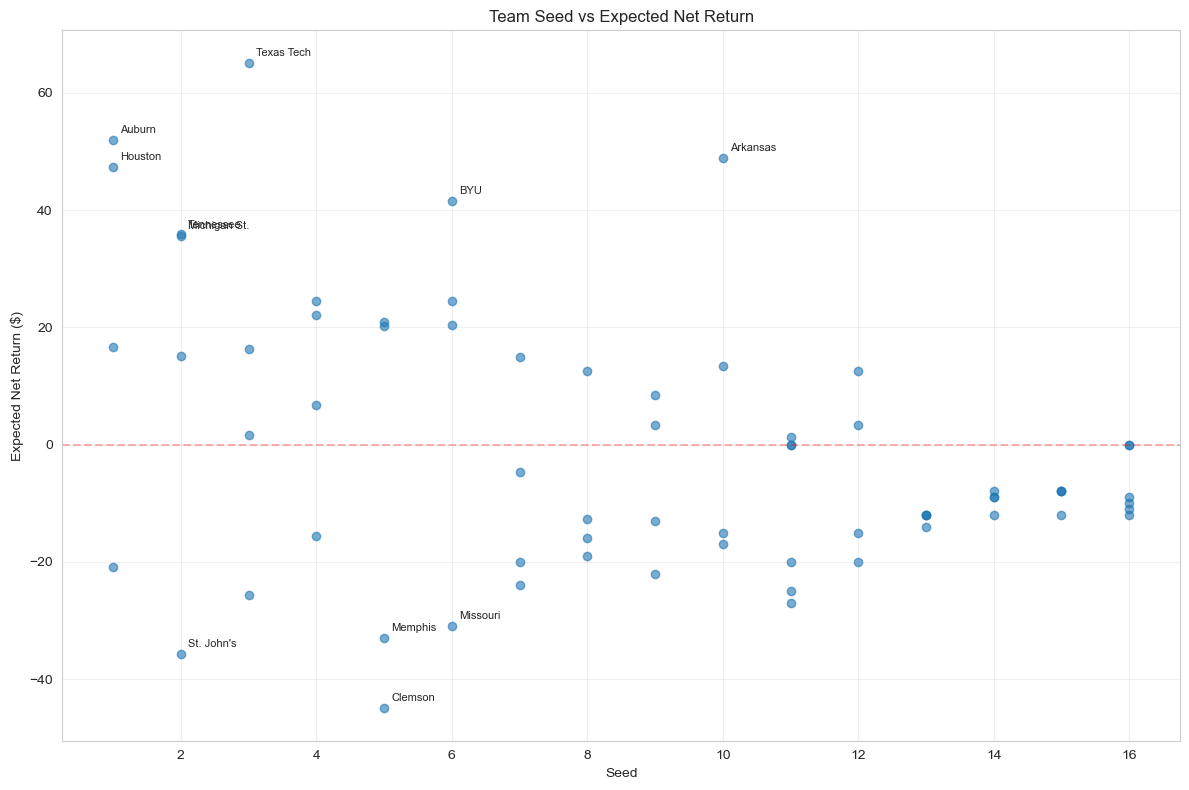

In [21]:
# Create scatter plot of seed vs expected net
plt.figure(figsize=(12, 8))

plt.scatter(team_results_df['Seed'], team_results_df['Expected Net'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.title('Team Seed vs Expected Net Return')
plt.xlabel('Seed')
plt.ylabel('Expected Net Return ($)')
plt.grid(True, alpha=0.3)

# Add team labels for points with significant expected net (positive or negative)
threshold = 30
for idx, row in team_results_df.iterrows():
    if abs(row['Expected Net']) > threshold:
        plt.annotate(row['Team'], 
                    (row['Seed'], row['Expected Net']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8)

plt.tight_layout()
plt.show()

